In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [6]:
print(x_train.shape , y_train.shape)

(60000, 28, 28) (60000,)


In [10]:
# x_train[0]

In [31]:
x_train = x_train/255
x_test = x_test/255

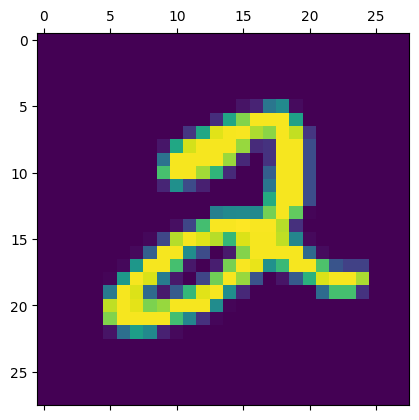

In [33]:
plt.matshow(x_train[5])

In [34]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
x_train1d=x_train.reshape(len(x_train),28*28)
x_test1d=x_test.reshape(len(x_test),28*28)
x_test1d

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

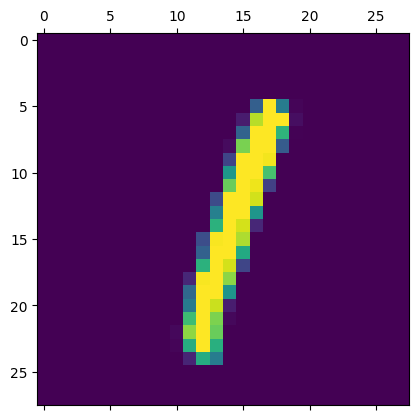

In [46]:
plt.matshow(x_test[5])

In [37]:
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train1d,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4650 - accuracy: 0.8780
Epoch 2/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3033 - accuracy: 0.9149
Epoch 3/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2829 - accuracy: 0.9213
Epoch 4/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2729 - accuracy: 0.9239
Epoch 5/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2663 - accuracy: 0.9258
Epoch 6/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2615 - accuracy: 0.9275
Epoch 7/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2581 - accuracy: 0.9290


In [39]:
y_pred = model.predict(x_test1d)

In [40]:
y_pred[0]

array([1.08171701e-02, 6.89934723e-08, 3.76285315e-02, 9.63550329e-01,
       1.08465552e-03, 1.08935535e-01, 4.92001504e-07, 9.99829412e-01,
       9.84446108e-02, 5.07279038e-01], dtype=float32)

In [51]:
y_pred_lables = [np.argmax(i) for i in y_pred]

In [45]:
np.argmax(y_pred[5])

1

In [59]:
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
cf = confusion_matrix(y_test,y_pred_lables)
cf

array([[ 960,    0,    2,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   4,    8,  931,   13,    7,    4,   14,    9,   40,    2],
       [   2,    0,   21,  916,    0,   26,    4,   11,   24,    6],
       [   1,    1,    4,    2,  902,    0,   17,    4,   12,   39],
       [   7,    2,    2,   31,    7,  787,   16,    7,   30,    3],
       [   7,    3,    4,    1,    7,   12,  920,    2,    2,    0],
       [   1,    6,   24,    6,    6,    1,    0,  955,    4,   25],
       [   6,    5,    7,   19,    8,   24,   11,   13,  876,    5],
       [  11,    7,    1,    9,   25,   10,    0,   30,   11,  905]],
      dtype=int64)

In [54]:
import seaborn as sns

<AxesSubplot:>

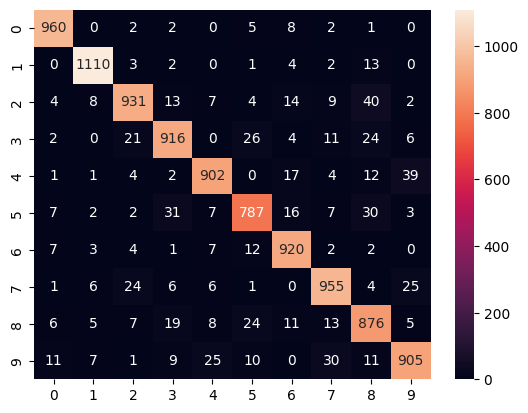

In [58]:
sns.heatmap(cf,annot=True,fmt='d')

In [62]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train1d,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2792 - accuracy: 0.9209
Epoch 2/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1271 - accuracy: 0.9625
Epoch 3/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0879 - accuracy: 0.9740
Epoch 4/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0675 - accuracy: 0.9793
Epoch 5/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0529 - accuracy: 0.9839
Epoch 6/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 7/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0349 - accuracy: 0.9897


In [79]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.9775


[0.07764667272567749, 0.9775000214576721]

In [71]:
y_pred = model.predict(x_test1d)
y_pred_lables = [np.argmax(i) for i in y_pred]

In [72]:
cf2 = confusion_matrix(y_test,y_pred_lables)
cf2

array([[ 971,    0,    0,    1,    3,    0,    2,    1,    1,    1],
       [   0, 1126,    3,    0,    0,    0,    2,    1,    3,    0],
       [   2,    1, 1016,    0,    1,    0,    1,    5,    5,    1],
       [   0,    0,    4,  989,    1,    5,    0,    5,    3,    3],
       [   1,    0,    5,    0,  967,    0,    3,    2,    0,    4],
       [   2,    0,    0,   12,    3,  866,    3,    2,    3,    1],
       [   5,    3,    4,    1,    5,    2,  937,    0,    1,    0],
       [   0,    4,   11,    2,    2,    0,    0,  999,    0,   10],
       [   6,    0,    7,    3,    5,    2,    2,    2,  941,    6],
       [   1,    5,    0,    5,   12,    3,    1,    6,    2,  974]],
      dtype=int64)

<AxesSubplot:>

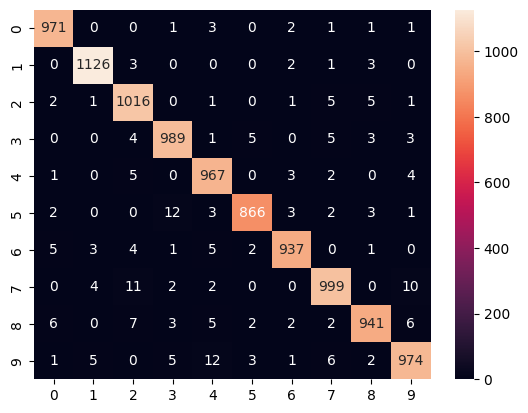

In [74]:
sns.heatmap(cf2,annot=True,fmt='d')

If you dont want to flatten x_train 2d array keras already have a fuction to flatten the array on its own.

In [90]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2763 - accuracy: 0.9206
Epoch 2/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1268 - accuracy: 0.9633
Epoch 3/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0883 - accuracy: 0.9736
Epoch 4/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0663 - accuracy: 0.9801
Epoch 5/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0519 - accuracy: 0.9845
Epoch 6/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 7/7
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0333 - accuracy: 0.9901


In [91]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9777


[0.07660660147666931, 0.9776999950408936]